In [1]:
import fastai
from fastai.vision.all import *

In [2]:
dls = ImageDataLoaders.from_folder('/content/drive/MyDrive/Colab Notebooks/esca-disease-classification/dataset', train='train', valid='val', bs=32, item_tfms=Resize(224))

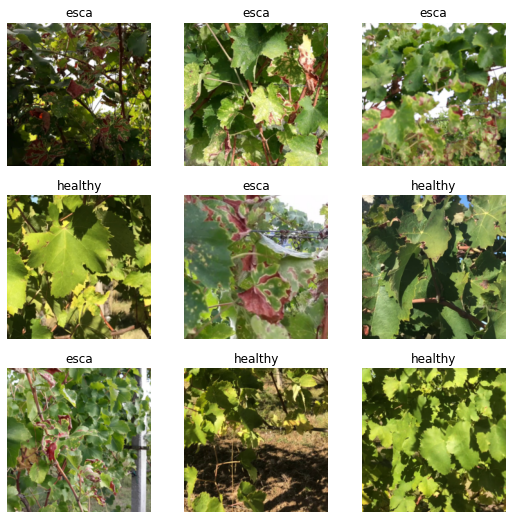

In [ ]:
dls.show_batch()

In [ ]:
dls.train_ds

(#1061) [(PILImage mode=RGB size=1280x720, TensorCategory(0)),(PILImage mode=RGB size=1920x1080, TensorCategory(0)),(PILImage mode=RGB size=1920x1080, TensorCategory(0)),(PILImage mode=RGB size=1920x1080, TensorCategory(0)),(PILImage mode=RGB size=1920x1080, TensorCategory(0)),(PILImage mode=RGB size=1920x1080, TensorCategory(0)),(PILImage mode=RGB size=1920x1080, TensorCategory(0)),(PILImage mode=RGB size=1280x720, TensorCategory(0)),(PILImage mode=RGB size=1280x720, TensorCategory(0)),(PILImage mode=RGB size=1920x1080, TensorCategory(0))...]

In [3]:
import torch
from torch import nn

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, 2)
        self.log = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        # x = x.view(-1, 32 * 56 * 56) #torch.Size([32, 100352])
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x)) #torch.Size([32, 512])
        x = self.fc2(x) #torch.Size([32, 1])
        # x = torch.squeeze(x, dim=1)  # remove the redundant dimension
        x = self.log(x)
        return x

In [5]:
from fastai.optimizer import OptimWrapper
from functools import partial

In [6]:
opt_func = partial(OptimWrapper, opt=torch.optim.Adam)

In [7]:
import fastai.callback.schedule # To get `fit_one_cycle`, `lr_find`
from fastai.metrics import accuracy
import torch.nn.functional as F

In [8]:
learn = Learner(dls, 
                CNN(),
                # loss_func=nn.BCELoss(),
                # loss_func=nn.BCEWithLogitsLoss(),
                # loss_func=nn.NLLLoss(),
                # loss_func=nn.CrossEntropyLoss(),
                loss_func=F.nll_loss,
                opt_func=opt_func,
                metrics=accuracy)

In [56]:
# !pip install pixiedust

In [9]:
import pixiedust

Pixiedust database opened successfully


In [10]:
learn.fit_one_cycle(n_epoch=1, lr_max=1e-2)

/usr/local/lib/python3.8/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (log) that exists in the learner. Use `self.learn.log` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,0.782892,0.681059,0.535849,02:55


In [11]:
files = get_image_files('/content/drive/MyDrive/Colab Notebooks/esca-disease-classification/dataset/test')
len(files)

444

In [12]:
files[10]

Path('/content/drive/MyDrive/Colab Notebooks/esca-disease-classification/dataset/test/esca/esca_634_cam1.jpg')

In [17]:
learn.predict(files[10])

/usr/local/lib/python3.8/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (log) that exists in the learner. Use `self.learn.log` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


("['esca', 'esca']", tensor([-0.6681, -0.7188]), tensor([-0.6681, -0.7188]))

In [ ]:
pred_idx = learn.predict(files[0])[1].argmax().item()
# pred_class = learn.data.classes[pred_idx]
# print(f"Prediction: {pred_class}")

In [ ]:
pred_idx

0

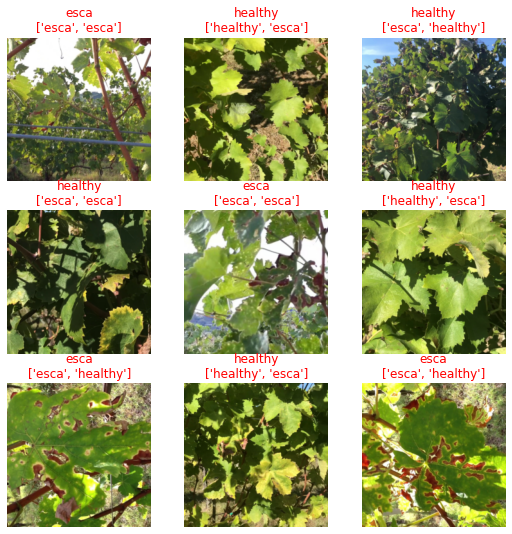

In [ ]:
learn.show_results()

In [ ]:
# learn.export('esca_model3.pkl')

In [ ]:
# learn = load_learner('/content/drive/MyDrive/Colab Notebooks/esca-disease-classification/dataset/model.pkl')

#### save the whole model
it saved a model with around 250 MB, size on disk is 256 MB

In [ ]:
# learn.save('esca_model3')

In [ ]:
!pwd

/content


In [ ]:
learn.save('/content/drive/MyDrive/Colab Notebooks/esca-disease-classification/esca_classification_model', with_opt=False)

Path('/content/drive/MyDrive/Colab Notebooks/esca-disease-classification/esca_classification_model.pth')

In [ ]:
# learninginterpreter = ClassificationInterpretation.from_learner(learn)

In [ ]:
# learninginterpreter

In [ ]:
# learninginterpreter.plot_confusion_matrix()

In [ ]:
# dls.dataset.valid.items

In [ ]:
new_net = CNN()
# new_net.cuda()
net_dict = torch.load('/content/drive/MyDrive/Colab Notebooks/esca-disease-classification/esca_classification_model.pth', map_location=torch.device('cpu')) 
new_net.load_state_dict(net_dict)


<All keys matched successfully>

In [ ]:
files = get_image_files('/content/drive/MyDrive/Colab Notebooks/esca-disease-classification/dataset/test')
len(files)

444

In [ ]:
files[0]

Path('/content/drive/MyDrive/Colab Notebooks/esca-disease-classification/dataset/test/esca/esca_794_cam2.jpg')

In [ ]:
from PIL import Image

In [ ]:
im = Image.open('/content/drive/MyDrive/Colab Notebooks/esca-disease-classification/dataset/test/esca/esca_794_cam2.jpg')
im.load()

In [ ]:
# im

In [ ]:
import torch, torchvision
import torchvision.transforms as transforms

In [ ]:
tfms = transforms.Compose([transforms.ToTensor(),
                           transforms.Resize((224,224)),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
tfmd_im = tfms(im) 
tfmd_im.shape

torch.Size([3, 224, 224])

In [ ]:
tfmd_im = tfmd_im.unsqueeze(0)
tfmd_im.shape

torch.Size([1, 3, 224, 224])

In [ ]:
with torch.no_grad():
    tfmd_im = tfmd_im
    preds = new_net(tfmd_im)

In [ ]:
preds

tensor([[-0.9464, -0.4912]])

In [ ]:
preds.argmax(dim=-1)

tensor([1])

In [ ]:
# learn.show_results(ds_type=dls.train)

NameError: ignored